In [9]:
# Victor Z, Jaron T
# UW-Madison, 2024
# illustrate scalar linear estimation

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

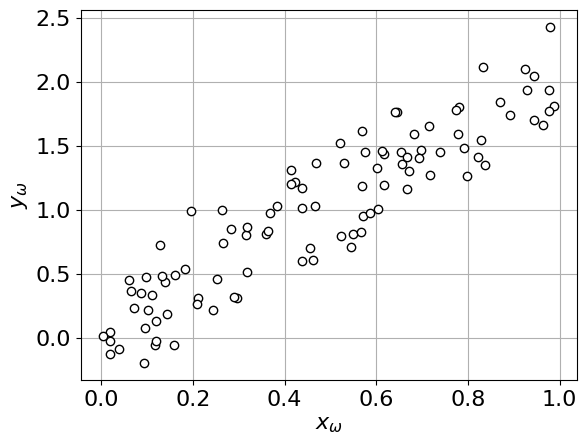

In [11]:
# generate data for input
np.random.seed(0)
S = 100
xobs = np.random.rand(S, 1)

# generate true output
theta = 2
y = theta * xobs

# add noise
sigma = 0.25
eps = np.random.normal(0, sigma, (S, 1))
yobs = y + eps

# now get estimate theta that extracts max knowledge from data
htheta = (xobs.T @ yobs) / (xobs.T @ xobs)
htheta = htheta[0, 0]  # convert to scalar

# plot model prediction
ypred = htheta * xobs

plt.figure(3)
plt.plot(xobs, yobs, 'ko', markerfacecolor='w')
plt.grid(True)
plt.xlabel(r'$x_\omega$', fontsize=16)
plt.ylabel(r'$y_\omega$', fontsize=16)
plt.gca().tick_params(labelsize=16)
plt.savefig('ch5_lin_est.eps', format='eps')


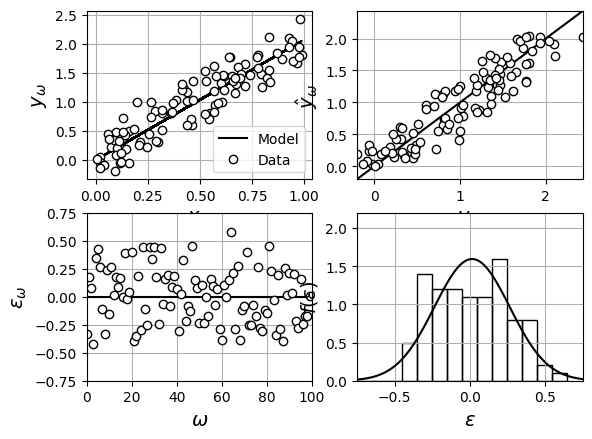

In [12]:
plt.figure(1)
plt.subplot(2, 2, 1)
plt.plot(xobs, ypred, 'k-', linewidth=1.5)
plt.plot(xobs, yobs, 'ko', markerfacecolor='w')
plt.grid(True)
plt.legend(['Model', 'Data'], loc='lower right')
plt.xlabel(r'$x_\omega$', fontsize=14)
plt.ylabel(r'$y_\omega$', fontsize=14)

# parity plot
plt.subplot(2, 2, 2)
yy = np.linspace(yobs.min(), yobs.max())
plt.plot(yy, yy, 'k-', linewidth=1.5)
plt.plot(yobs, ypred, 'ko', markerfacecolor='w')
plt.axis([yobs.min(), yobs.max(), yobs.min(), yobs.max()])
plt.grid(True)
plt.xlabel(r'$y_\omega$', fontsize=14)
plt.ylabel(r'$\hat{y}_\omega$', fontsize=14)

# plot residuals
epsm = yobs - ypred
xx = np.linspace(0, S)
yy = np.zeros_like(xx)
plt.subplot(2, 2, 3)
plt.plot(xx, yy, 'k-', linewidth=1.5)
plt.plot(epsm, 'ko', markerfacecolor='w')
plt.axis([0, S, -3 * sigma, 3 * sigma])
plt.grid(True)
plt.xlabel(r'$\omega$', fontsize=14)
plt.ylabel(r'$\epsilon_\omega$', fontsize=14)

mu, std = norm.fit(epsm)

plt.subplot(2, 2, 4)
plt.hist(epsm, bins=np.arange(-0.75, 0.75, 0.1), density=True, edgecolor='black', facecolor='none', linewidth=1)
xx = np.linspace(-0.75, 0.75, 100)
plt.plot(xx, norm.pdf(xx, mu, std), 'k-', linewidth=1.5)
plt.axis([-0.75, 0.75, 0, 2.2])
plt.grid(True)
plt.xlabel(r'$\epsilon$', fontsize=14)
plt.ylabel(r'$f(\epsilon)$', fontsize=14)

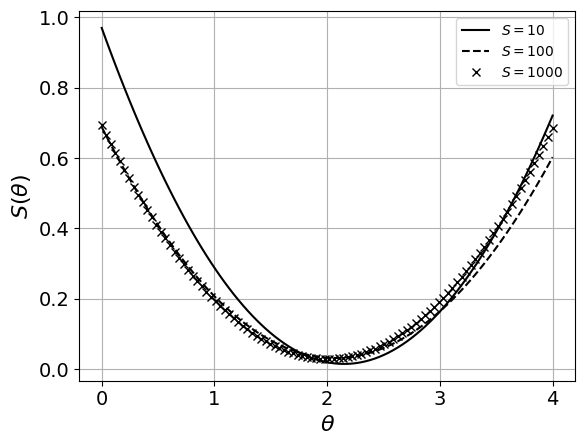

In [13]:
# now let's evaluate how SSE(theta) varies with amount of data available
# generate data for input
np.random.seed(0)
S = 10
xobs = np.random.rand(S, 1)

# generate true output
theta = 2
y = theta * xobs

# add noise
eps = np.random.normal(0, sigma, (S, 1))
yobs = y + eps

# span theta
thetav = np.linspace(0, 4, 100)
Sf = np.zeros_like(thetav)

for k in range(len(thetav)):
    ym = thetav[k] * xobs
    Sf[k] = 0.5 * ((ym - yobs).T @ (ym - yobs))[0, 0]

plt.figure(2)
plt.plot(thetav, (1 / S) * Sf, 'k-', linewidth=1.5)

# generate data for input
np.random.seed(0)
S = 100
xobs = np.random.rand(S, 1)

# generate true output
theta = 2
y = theta * xobs

# add noise
eps = np.random.normal(0, sigma, (S, 1))
yobs = y + eps

# span theta
Sf = np.zeros_like(thetav)

for k in range(len(thetav)):
    ym = thetav[k] * xobs
    Sf[k] = 0.5 * ((ym - yobs).T @ (ym - yobs))[0, 0]

plt.plot(thetav, (1 / S) * Sf, 'k--', linewidth=1.5)

# generate data for input
np.random.seed(0)
S = 1000
xobs = np.random.rand(S, 1)

# generate true output
theta = 2
y = theta * xobs

# add noise
eps = np.random.normal(0, sigma, (S, 1))
yobs = y + eps

# span theta
Sf = np.zeros_like(thetav)

for k in range(len(thetav)):
    ym = thetav[k] * xobs
    Sf[k] = 0.5 * ((ym - yobs).T @ (ym - yobs))[0, 0]

plt.plot(thetav, (1 / S) * Sf, 'kx')
plt.grid(True)
plt.xlabel(r'$\theta$', fontsize=16)
plt.ylabel(r'$S(\theta)$', fontsize=16)
plt.gca().tick_params(labelsize=14)
plt.legend([r'$S=10$', r'$S=100$', r'$S=1000$'], loc='best')
plt.show()